In [115]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
from matplotlib import pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [116]:
# use census district to select study area
nyc2020cd = gpd.read_file('./Data/nyc2020_cd/2020 Community District Tabulation Areas (CDTAs) Tabular.geojson')
nyc2020cd

,shape_area,cdtatype,cdtaname,shape_leng,boroname,borocode,countyfips,cdta2020,geometry
0,131659858.454,0,BK01 Williamsburg-Greenpoint (CD 1 Equivalent),65642.1757321,Brooklyn,3,047,BK01,"MULTIPOLYGON (((-73.92406 40.71411, -73.92404 ..."
1,75913814.0222,0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,65257.7399657,Brooklyn,3,047,BK02,"MULTIPOLYGON (((-73.96929 40.70709, -73.96839 ..."
2,78196221.1105,0,BK03 Bedford-Stuyvesant (CD 3 Approximation),37550.8535129,Brooklyn,3,047,BK03,"MULTIPOLYGON (((-73.91805 40.68721, -73.91800 ..."
3,56653385.3757,0,BK04 Bushwick (CD 4 Equivalent),36981.7225222,Brooklyn,3,047,BK04,"MULTIPOLYGON (((-73.89653 40.68240, -73.89661 ..."
4,165455764.779,0,BK05 East New York-Cypress Hills (CD 5 Approxi...,78801.9018459,Brooklyn,3,047,BK05,"MULTIPOLYGON (((-73.88829 40.64672, -73.88829 ..."
...,...,...,...,...,...,...,...,...,...
66,121361272.643,1,QN84 Jamaica Bay (East) (JIA 84 Approximation),224308.867963,Queens,4,081,QN84,"MULTIPOLYGON (((-73.86361 40.57382, -73.86449 ..."
67,377299029.23,0,SI01 North Shore (CD 1 Equivalent),153754.769633,Staten Island,5,085,SI01,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
68,606151465.59,0,SI02 Mid-Island (CD 2 Approximation),145681.61763,Staten Island,5,085,SI02,"MULTIPOLYGON (((-74.06398 40.60214, -74.06312 ..."
69,595425216.472,0,SI03 South Shore (CD 3 Approximation),179449.785577,Staten Island,5,085,SI03,"MULTIPOLYGON (((-74.10010 40.55895, -74.10021 ..."


<AxesSubplot:>

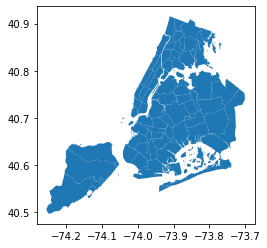

In [117]:
nyc2020cd.plot()

In [118]:
# population at census block level
nyc2020cb = gpd.read_file('./Data/nyc2020_census_block/geo_export_a038f0f3-72f5-41fe-9a00-3a6f400fd52e.shp')
nyc2020cb

,cb2020,borocode,boroname,ct2020,bctcb2020,geoid,shape_leng,shape_area,geometry
0,1000,1,Manhattan,000100,10001001000,360610001001000,6627.858318,1.204255e+06,"POLYGON ((-74.03995 40.70089, -74.03945 40.700..."
1,1001,1,Manhattan,000100,10001001001,360610001001001,4395.190183,6.401664e+05,"POLYGON ((-74.04388 40.69019, -74.04351 40.689..."
2,1000,1,Manhattan,000201,10002011000,360610002011000,1569.384823,1.292763e+05,"POLYGON ((-73.98511 40.71379, -73.98706 40.713..."
3,1001,1,Manhattan,000201,10002011001,360610002011001,1594.263060,1.393605e+05,"POLYGON ((-73.98506 40.71308, -73.98544 40.713..."
4,2000,1,Manhattan,000201,10002012000,360610002012000,2055.295801,2.633085e+05,"POLYGON ((-73.98495 40.71236, -73.98485 40.711..."
...,...,...,...,...,...,...,...,...,...
37585,1023,5,Staten Island,032300,50323001023,360850323001023,989.980458,4.058549e+04,"POLYGON ((-74.17476 40.62580, -74.17580 40.625..."
37586,1024,5,Staten Island,032300,50323001024,360850323001024,1415.098063,7.627434e+04,"POLYGON ((-74.17580 40.62593, -74.17657 40.625..."
37587,1025,5,Staten Island,032300,50323001025,360850323001025,6111.207288,1.141635e+06,"POLYGON ((-74.16848 40.62157, -74.16873 40.621..."
37588,0005,5,Staten Island,990100,59901000005,360859901000005,1736.373482,1.283016e+05,"POLYGON ((-74.05051 40.56642, -74.05047 40.566..."


In [119]:
# spatial join two dataset
df = gpd.sjoin(nyc2020cd,nyc2020cb,how='right')

In [120]:
# study area
cbBK26 = df[df['cdta2020'].isin(['BK02','BK06'])]
cbBK26.head()

,index_left,shape_area_left,cdtatype,cdtaname,shape_leng_left,boroname_left,borocode_left,countyfips,cdta2020,cb2020,borocode_right,boroname_right,ct2020,bctcb2020,geoid,shape_leng_right,shape_area_right,geometry
22,1,75913814.0222,0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,65257.7399657,Brooklyn,3,047,BK02,5000,1,Manhattan,000202,10002025000,360610002025000,989.253459,16174.069178,"POLYGON ((-73.98233 40.70555, -73.98237 40.705..."
65,1,75913814.0222,0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,65257.7399657,Brooklyn,3,047,BK02,2000,1,Manhattan,000500,10005002000,360610005002000,2050.807776,235331.466576,"POLYGON ((-74.00127 40.69330, -74.00154 40.692..."
65,5,86641619.9327,0,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,77379.0962877,Brooklyn,3,047,BK06,2000,1,Manhattan,000500,10005002000,360610005002000,2050.807776,235331.466576,"POLYGON ((-74.00127 40.69330, -74.00154 40.692..."
66,5,86641619.9327,0,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,77379.0962877,Brooklyn,3,047,BK06,2001,1,Manhattan,000500,10005002001,360610005002001,2068.174371,226986.189436,"POLYGON ((-74.00382 40.68893, -74.00459 40.688..."
67,5,86641619.9327,0,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,77379.0962877,Brooklyn,3,047,BK06,2002,1,Manhattan,000500,10005002002,360610005002002,2020.412890,223243.494947,"POLYGON ((-74.00500 40.68761, -74.00563 40.686..."


In [121]:
cbBK26 = cbBK26[['cdtaname','boroname_left','cdta2020','geoid','geometry']]

<AxesSubplot:>

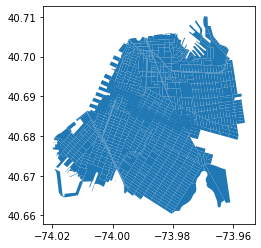

In [122]:
cbBK26.plot()

In [123]:
# check duplicate
cbBK26[cbBK26.duplicated()]

,cdtaname,boroname_left,cdta2020,geoid,geometry


In [124]:
# use Decennial 2020 population to calculate demand
cbpop = pd.read_csv('./Data/DECENNIALPL2020.csv', skiprows=1,usecols=['id','Geographic Area Name',' !!Total:'])
cbpop.rename(columns={' !!Total:':'Population'},inplace=True)
cbpop.head()

,id,Geographic Area Name,Population
0,1000000US360050001000001,"Block 0001, Block Group 0, Census Tract 1, Bro...",0
1,1000000US360050001000002,"Block 0002, Block Group 0, Census Tract 1, Bro...",0
2,1000000US360050001001000,"Block 1000, Block Group 1, Census Tract 1, Bro...",171
3,1000000US360050001001001,"Block 1001, Block Group 1, Census Tract 1, Bro...",1344
4,1000000US360050001001002,"Block 1002, Block Group 1, Census Tract 1, Bro...",367


In [125]:
cbpop['id'] = cbpop['id'].str.replace('1000000US','')
cbpop.head()

,id,Geographic Area Name,Population
0,360050001000001,"Block 0001, Block Group 0, Census Tract 1, Bro...",0
1,360050001000002,"Block 0002, Block Group 0, Census Tract 1, Bro...",0
2,360050001001000,"Block 1000, Block Group 1, Census Tract 1, Bro...",171
3,360050001001001,"Block 1001, Block Group 1, Census Tract 1, Bro...",1344
4,360050001001002,"Block 1002, Block Group 1, Census Tract 1, Bro...",367


In [126]:
cbpop[cbpop['id'].isin(cbBK26['geoid'].unique())]

,id,Geographic Area Name,Population
5320,360470001001000,"Block 1000, Block Group 1, Census Tract 1, Kin...",25
5321,360470001001001,"Block 1001, Block Group 1, Census Tract 1, Kin...",36
5322,360470001001002,"Block 1002, Block Group 1, Census Tract 1, Kin...",0
5323,360470001001003,"Block 1003, Block Group 1, Census Tract 1, Kin...",0
5324,360470001001004,"Block 1004, Block Group 1, Census Tract 1, Kin...",14
...,...,...,...
15348,360610009000001,"Block 0001, Block Group 0, Census Tract 9, New...",0
15374,360610009002000,"Block 2000, Block Group 2, Census Tract 9, New...",0
15375,360610009002001,"Block 2001, Block Group 2, Census Tract 9, New...",0
15492,360610015010002,"Block 0002, Block Group 0, Census Tract 15.01,...",0


In [127]:
# population merge with census block
cbBK26pop = pd.merge(cbpop,cbBK26, left_on='id',right_on='geoid',how='right')

In [128]:
cbBK26pop = cbBK26pop.drop(['id'],axis=1)
cbBK26pop

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,geometry
0,"Block 5000, Block Group 5, Census Tract 2.02, ...",0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360610002025000,"POLYGON ((-73.98233 40.70555, -73.98237 40.705..."
1,"Block 2000, Block Group 2, Census Tract 5, New...",0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360610005002000,"POLYGON ((-74.00127 40.69330, -74.00154 40.692..."
2,"Block 2000, Block Group 2, Census Tract 5, New...",0,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,Brooklyn,BK06,360610005002000,"POLYGON ((-74.00127 40.69330, -74.00154 40.692..."
3,"Block 2001, Block Group 2, Census Tract 5, New...",0,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,Brooklyn,BK06,360610005002001,"POLYGON ((-74.00382 40.68893, -74.00459 40.688..."
4,"Block 2002, Block Group 2, Census Tract 5, New...",0,BK06 Park Slope-Carroll Gardens (CD 6 Approxim...,Brooklyn,BK06,360610005002002,"POLYGON ((-74.00500 40.68761, -74.00563 40.686..."
...,...,...,...,...,...,...,...
1204,"Block 1004, Block Group 1, Census Tract 547, K...",108,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470547001004,"POLYGON ((-73.96738 40.70764, -73.96742 40.707..."
1205,"Block 3004, Block Group 3, Census Tract 547, K...",1359,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470547003004,"POLYGON ((-73.96852 40.71004, -73.96848 40.709..."
1206,"Block 1001, Block Group 1, Census Tract 1237, ...",0,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360471237001001,"POLYGON ((-73.96007 40.69784, -73.96093 40.697..."
1207,"Block 1002, Block Group 1, Census Tract 1237, ...",307,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360471237001002,"POLYGON ((-73.95977 40.69642, -73.96062 40.696..."


In [129]:
cbBK26pop[cbBK26pop.duplicated()]

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,geometry


In [130]:
cbBK26popGeo = gpd.GeoDataFrame(cbBK26pop, geometry = cbBK26pop['geometry'] ).set_crs(epsg=4326)

In [131]:
# fillter out census block where population less than 10
cbBK26popGeo = cbBK26popGeo[cbBK26popGeo['Population']>=10]

/Users/taoliang/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


Text(0.5, 1.0, 'Population by census tract')

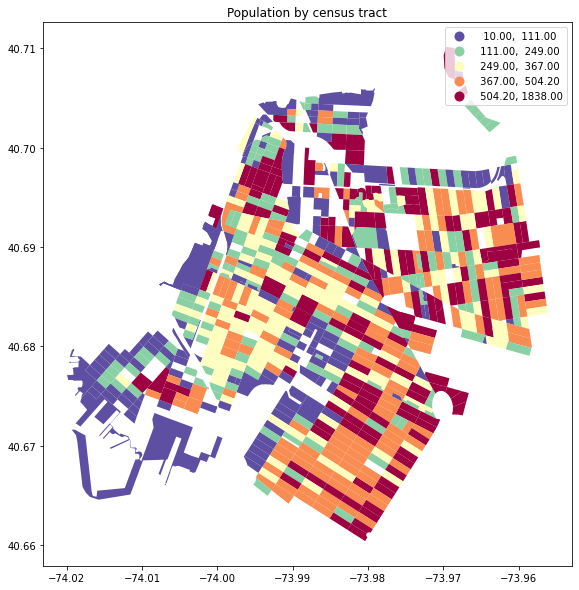

In [132]:
cbBK26popGeo.plot(column='Population', colormap='Spectral_r',
                    scheme = 'Quantiles', legend=True,figsize=(10,10))

plt.title('Population by census tract')

In [133]:
# generate block centre point as our demand node
cbBK26Point = cbBK26popGeo
cbBK26Point['geometry'] = cbBK26popGeo.representative_point()
cbBK26Point.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,geometry
16,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,POINT (-73.99414 40.70247)
17,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,POINT (-73.99462 40.70261)
20,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,POINT (-73.99340 40.70128)
21,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,POINT (-73.99347 40.70221)
22,"Block 1006, Block Group 1, Census Tract 1, Kin...",17,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001006,POINT (-73.99552 40.70083)


In [134]:
# 812 demand point
len(cbBK26Point)

812

In [135]:
TotalPOP = cbBK26Point['Population'].sum()
TotalPOP

283492

In [136]:
# normalized census block population and use 6000 total demand to calculate demand at each point
cbBK26PointClean = cbBK26Point.copy()
cbBK26PointClean['Demand'] = cbBK26Point['Population']/TotalPOP*6000

In [137]:
cbBK26PointClean.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,geometry,Demand
16,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,POINT (-73.99414 40.70247),0.529115
17,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,POINT (-73.99462 40.70261),0.761926
20,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,POINT (-73.99340 40.70128),0.296305
21,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,POINT (-73.99347 40.70221),3.851961
22,"Block 1006, Block Group 1, Census Tract 1, Kin...",17,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001006,POINT (-73.99552 40.70083),0.359799


In [138]:
import math

In [143]:
# Rounding up demand
cbBK26PointClean['Demand'] = cbBK26PointClean['Demand'].apply(lambda x: math.ceil(x))
cbBK26PointClean.head()

,Geographic Area Name,Population,cdtaname,boroname_left,cdta2020,geoid,geometry,Demand
16,"Block 1000, Block Group 1, Census Tract 1, Kin...",25,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001000,POINT (-73.99414 40.70247),1
17,"Block 1001, Block Group 1, Census Tract 1, Kin...",36,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001001,POINT (-73.99462 40.70261),1
20,"Block 1004, Block Group 1, Census Tract 1, Kin...",14,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001004,POINT (-73.99340 40.70128),1
21,"Block 1005, Block Group 1, Census Tract 1, Kin...",182,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001005,POINT (-73.99347 40.70221),4
22,"Block 1006, Block Group 1, Census Tract 1, Kin...",17,BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...,Brooklyn,BK02,360470001001006,POINT (-73.99552 40.70083),1


In [144]:
# total demand
cbBK26PointClean['Demand'].sum()

6430

In [145]:
cbBK26PointClean.to_file('./cbBK26PointClean.geojson')